## Ensemble Technique

In [1]:
# to ignore all the non-harmful warnings
from warnings import filterwarnings
filterwarnings('ignore')

## Data Ingestion

In [2]:
import pandas as pd
df = pd.read_csv(r'D:\Machine-Learning\repository\Ensumble\train_loan.csv')
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


## Perform basic data quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [4]:
df.shape

(58645, 13)

In [5]:
df.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

In [6]:
df.isna().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [7]:
df.duplicated().sum()

0

### There are no missing values or duplicated rows in this dataset

## Separate X and Y features
Y : loan_status

In [8]:
X = df.drop(columns=["loan_status","id"])
Y = df[["loan_status"]]

In [9]:
X.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3


In [10]:
Y.head()

,loan_status
0,0
1,0
2,0
3,0
4,0


## Data Preprocessing and Data cleaning

In [11]:
cat = list(X.columns[X.dtypes=="object"])
con = list(X.columns[X.dtypes!="object"])

In [12]:
cat

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [13]:
con

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

In [15]:
num_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
)

In [16]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore',sparse_output=False)
)

In [17]:
pre = ColumnTransformer(
    [
        ("Cat",cat_pipe,cat),
        ("Con",num_pipe,con)
    ]
).set_output(transform='pandas')

In [18]:
pre

ColumnTransformer(transformers=[('Cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['person_home_ownership', 'loan_intent',
                                  'loan_grade', 'cb_person_default_on_file']),
                                ('Con',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['person_age', 'person_income',
                                  'person_emp_length', 'loan_amnt',
                                  'loan_int_rate', 'loan_percent_income',
                                  'cb_person_cred_hist_length'])])

In [19]:
X_pre = pre.fit_transform(X)
X_pre.head()

,Cat__person_home_ownership_MORTGAGE,Cat__person_home_ownership_OTHER,Cat__person_home_ownership_OWN,Cat__person_home_ownership_RENT,Cat__loan_intent_DEBTCONSOLIDATION,Cat__loan_intent_EDUCATION,Cat__loan_intent_HOMEIMPROVEMENT,Cat__loan_intent_MEDICAL,Cat__loan_intent_PERSONAL,Cat__loan_intent_VENTURE,...,Cat__loan_grade_G,Cat__cb_person_default_on_file_N,Cat__cb_person_default_on_file_Y,Con__person_age,Con__person_income,Con__person_emp_length,Con__loan_amnt,Con__loan_int_rate,Con__loan_percent_income,Con__cb_person_cred_hist_length
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.566200,-0.765768,-1.187200,-0.578306,0.267616,0.117378,2.031798
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,-0.920057,-0.212128,0.328047,-0.937775,0.880532,-0.973242,-0.946489
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.240196,-0.929223,0.833130,-0.578306,-0.585854,0.553626,1.039036
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.405947,0.156966,2.348377,0.500101,0.142396,0.117378,-0.201917
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,-0.920057,-0.106673,-0.682117,-0.578306,-1.238314,-0.646056,-0.698298


## Split the data into training and testing

In [20]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,train_size=0.75,random_state=21)

In [21]:
xtrain.head()

,Cat__person_home_ownership_MORTGAGE,Cat__person_home_ownership_OTHER,Cat__person_home_ownership_OWN,Cat__person_home_ownership_RENT,Cat__loan_intent_DEBTCONSOLIDATION,Cat__loan_intent_EDUCATION,Cat__loan_intent_HOMEIMPROVEMENT,Cat__loan_intent_MEDICAL,Cat__loan_intent_PERSONAL,Cat__loan_intent_VENTURE,...,Cat__loan_grade_G,Cat__cb_person_default_on_file_N,Cat__cb_person_default_on_file_Y,Con__person_age,Con__person_income,Con__person_emp_length,Con__loan_amnt,Con__loan_int_rate,Con__loan_percent_income,Con__cb_person_cred_hist_length
7145,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,-0.091305,-0.844859,-0.177035,-0.578306,-1.238314,0.335502,0.294464
2756,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-0.257055,-0.699858,0.328047,0.500101,0.020472,1.753307,-0.946489
11700,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,6.372965,-0.897587,-1.187200,-0.578306,2.633605,0.444564,5.258276
25507,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-0.588556,-0.106673,1.085671,0.068738,-1.610677,0.008316,-0.698298
4286,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.737448,-0.317583,1.590753,-1.387112,-0.915379,-1.409489,0.294464


In [22]:
xtest.head()

,Cat__person_home_ownership_MORTGAGE,Cat__person_home_ownership_OTHER,Cat__person_home_ownership_OWN,Cat__person_home_ownership_RENT,Cat__loan_intent_DEBTCONSOLIDATION,Cat__loan_intent_EDUCATION,Cat__loan_intent_HOMEIMPROVEMENT,Cat__loan_intent_MEDICAL,Cat__loan_intent_PERSONAL,Cat__loan_intent_VENTURE,...,Cat__loan_grade_G,Cat__cb_person_default_on_file_N,Cat__cb_person_default_on_file_Y,Con__person_age,Con__person_income,Con__person_emp_length,Con__loan_amnt,Con__loan_int_rate,Con__loan_percent_income,Con__cb_person_cred_hist_length
40062,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-0.920057,0.288785,0.328047,1.039305,-0.921970,0.444564,-0.698298
30128,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-1.085808,-0.818495,0.075506,-1.117510,0.267616,-0.755118,-0.946489
34643,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.731951,1.475156,-0.429576,1.039305,1.124381,-0.318870,2.031798
39635,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,-0.422806,1.527884,-1.187200,0.500101,-1.116389,-0.646056,-0.450108
32787,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-1.085808,-1.055770,-0.682117,0.140632,2.172270,2.843926,-0.698298


In [23]:
ytrain.head()

,loan_status
7145,0
2756,1
11700,0
25507,0
4286,0


In [24]:
ytest.head()

,loan_status
40062,0
30128,0
34643,0
39635,0
32787,1


## Build the model

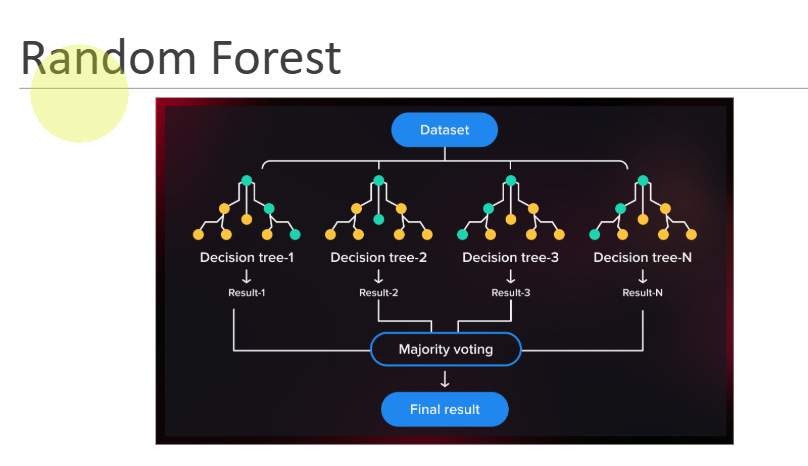

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
model = RandomForestClassifier(
    n_estimators=5,
    max_depth=4,
    min_samples_leaf=2,
    min_samples_split=5,
    criterion='gini'
)
model.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=5)

In [27]:
model.score(xtrain,ytrain)

0.9380215083100288

In [28]:
model.score(xtest,ytest)

0.9341154003546583

## Hyperparameter tuning

In [29]:
params1 = {
    "n_estimators":[10,50,75,100,150,200],
    "max_depth":[3,5,7,9,11]
}

In [30]:
from sklearn.model_selection import RandomizedSearchCV
model_rf = RandomForestClassifier()
rscv = RandomizedSearchCV(estimator=model_rf,param_distributions=params1,scoring="f1_macro",cv=5)
rscv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [3, 5, 7, 9, 11],
                                        'n_estimators': [10, 50, 75, 100, 150,
                                                         200]},
                   scoring='f1_macro')

In [31]:
rscv.best_params_

{'n_estimators': 50, 'max_depth': 11}

In [32]:
rscv.best_score_

0.8855391539069399

In [33]:
best_random = rscv.best_estimator_

## Model evaluation

In [34]:
best_random.score(xtrain,ytrain)

0.9557328968010368

In [35]:
best_random.score(xtest,ytest)

0.9489155640431046

In [36]:
ypred_test = best_random.predict(xtest)
ypred_test[:5]

array([0, 0, 0, 0, 1], dtype=int64)

In [37]:
ytest.head()

,loan_status
40062,0
30128,0
34643,0
39635,0
32787,1


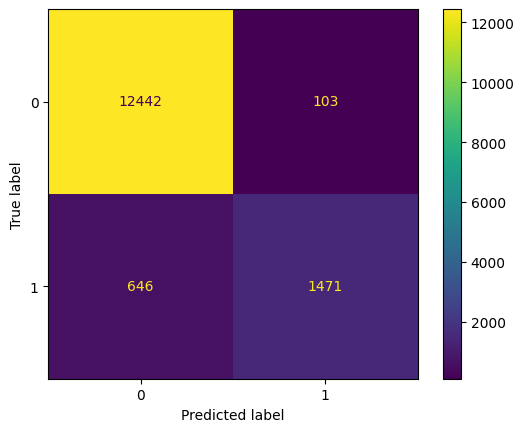

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
ConfusionMatrixDisplay.from_estimator(best_random,xtest,ytest)

In [39]:
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     12545
           1       0.93      0.69      0.80      2117

    accuracy                           0.95     14662
   macro avg       0.94      0.84      0.88     14662
weighted avg       0.95      0.95      0.95     14662



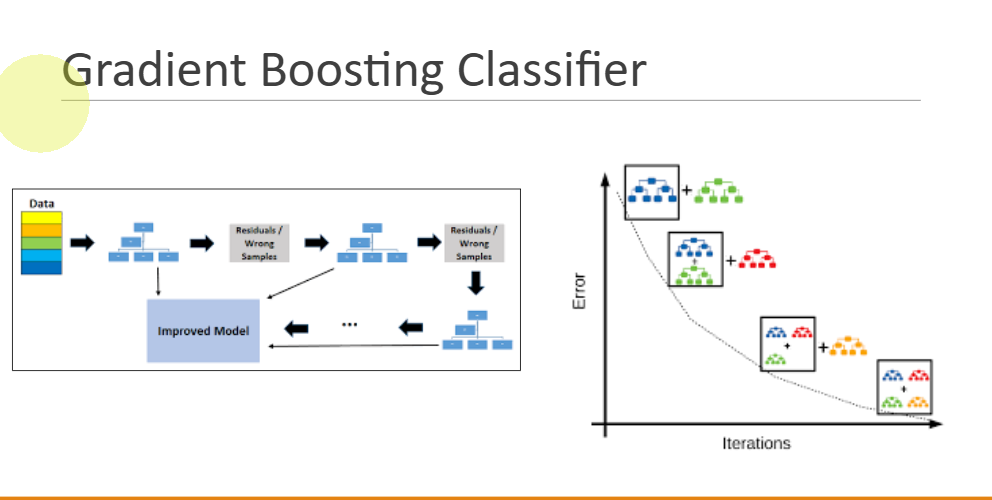

In [40]:
from sklearn.ensemble import GradientBoostingClassifier

In [41]:
model2 = GradientBoostingClassifier(
    learning_rate=0.01,
    max_depth=4,
    n_estimators=3,
    min_samples_leaf=3,
    min_samples_split=2
)
model2.fit(xtrain,ytrain)

GradientBoostingClassifier(learning_rate=0.01, max_depth=4, min_samples_leaf=3,
                           n_estimators=3)

In [42]:
model2.score(xtrain,ytrain)

0.8582861560148239

In [43]:
model2.score(xtest,ytest)

0.8556131496385213

## Hyperparamter tuning

In [44]:
params2 = {
    "n_estimators":[3,4,5],
    "learning_rate":[0.01,0.1,0.2]
}

In [45]:
model_gb = GradientBoostingClassifier()
rscv2 = RandomizedSearchCV(estimator=model_gb,cv=5,scoring="f1_macro",param_distributions=params2)
rscv2.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'n_estimators': [3, 4, 5]},
                   scoring='f1_macro')

In [46]:
rscv2.best_params_

{'n_estimators': 5, 'learning_rate': 0.2}

In [47]:
rscv2.best_score_

0.823955574513777

In [48]:
best_grad = rscv2.best_estimator_

## Model evaluation

In [49]:
best_grad.score(xtrain,ytrain)

0.9322465498033331

In [50]:
best_grad.score(xtest,ytest)

0.9291365434456418

In [51]:
ypred_test2 = best_grad.predict(xtest)
ypred_test2[:5]

array([0, 0, 0, 0, 1], dtype=int64)

In [52]:
ytest.head()

,loan_status
40062,0
30128,0
34643,0
39635,0
32787,1


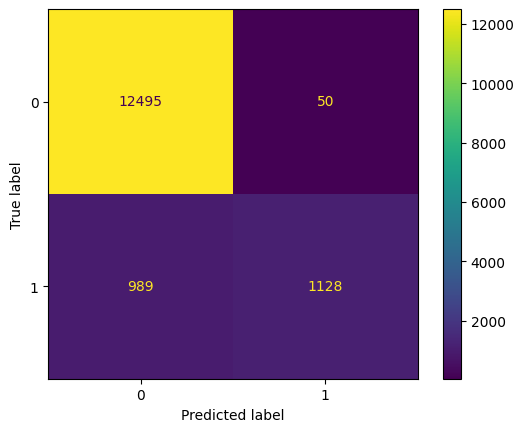

In [53]:
ConfusionMatrixDisplay.from_estimator(best_grad,xtest,ytest)

In [54]:
print(classification_report(ytest,ypred_test2))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     12545
           1       0.96      0.53      0.68      2117

    accuracy                           0.93     14662
   macro avg       0.94      0.76      0.82     14662
weighted avg       0.93      0.93      0.92     14662



## Extreme Gradient Boosting

In [55]:
# %pip install xgboost

In [56]:
from xgboost import XGBClassifier

model3 = XGBClassifier(
    n_estimators = 150,
    learning_rate = 0.1,
    max_depth = 5,
    min_samples_leaf=3,
    min_samples_split=2
)

model3.fit(xtrain,ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, min_samples_leaf=3,
              min_samples_split=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, ...)

In [57]:
model3.score(xtrain,ytrain)

0.9564604506286519

In [58]:
model3.score(xtest,ytest)

0.9512344836993589

## Hyperparameter tuning

In [59]:
params3 ={
     "n_estimators":[75,100,150,200,250],
    "learning_rate":[0.01,0.1,0.2]
}

In [60]:
model_xgb = XGBClassifier()
rscv3 = RandomizedSearchCV(estimator=model_xgb,scoring="f1_macro",param_distributions=params3,cv=5)
rscv3.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           learning_rate=None, max_bin=None,
                                           max_cat_threshold=None,
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'n_estimators': [75, 100, 150, 200,
                                                         250]},
                   scoring='f1_macro')

In [61]:
rscv3.best_params_

{'n_estimators': 75, 'learning_rate': 0.2}

In [62]:
rscv3.best_score_

0.8938511629712587

In [63]:
best_xgb = rscv3.best_estimator_

## Model evaluation

In [64]:
best_xgb.score(xtrain,ytrain)

0.9593706659391128

In [65]:
best_xgb.score(xtest,ytest)

0.9515755012958669

In [66]:
best_random.score(xtest,ytest)

0.9489155640431046

## Out of sample predictions

In [67]:
xnew = pd.read_csv(r'D:\Machine-Learning\repository\Ensumble\test_loan.csv')
xnew.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [68]:
xnew_pre = pre.transform(xnew)
xnew_pre.head()

,Cat__person_home_ownership_MORTGAGE,Cat__person_home_ownership_OTHER,Cat__person_home_ownership_OWN,Cat__person_home_ownership_RENT,Cat__loan_intent_DEBTCONSOLIDATION,Cat__loan_intent_EDUCATION,Cat__loan_intent_HOMEIMPROVEMENT,Cat__loan_intent_MEDICAL,Cat__loan_intent_PERSONAL,Cat__loan_intent_VENTURE,...,Cat__loan_grade_G,Cat__cb_person_default_on_file_N,Cat__cb_person_default_on_file_Y,Con__person_age,Con__person_income,Con__person_emp_length,Con__loan_amnt,Con__loan_int_rate,Con__loan_percent_income,Con__cb_person_cred_hist_length
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-0.754307,0.130602,-0.429576,2.836651,1.674687,2.189555,-0.946489
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,-0.257055,0.842425,0.328047,0.140632,0.659750,-0.646056,-0.450108
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,-0.257055,-0.897587,0.075506,-0.937775,2.145908,-0.318870,-0.946489
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.903198,-0.370311,-0.177035,-0.398572,-0.585854,-0.209808,0.294464
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-0.257055,1.000608,0.833130,1.039305,1.859221,-0.100746,-0.450108


In [69]:
loan_predictions = best_xgb.predict(xnew_pre)
loan_predictions[:5]

array([1, 0, 1, 0, 0])

In [70]:
loan_proba = best_xgb.predict_proba(xnew_pre)
loan_proba[:5]

array([[0.0037719 , 0.9962281 ],
       [0.9818795 , 0.01812052],
       [0.19761169, 0.8023883 ],
       [0.98947024, 0.01052977],
       [0.92211574, 0.07788423]], dtype=float32)

## Save the output to a dataframe

In [71]:
xnew["Loan_status_Predictions"] = loan_predictions
xnew.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,Loan_status_Predictions
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2,1
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4,0
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2,1
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7,0
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4,0


In [72]:
xnew.to_csv('LoanPredictionResults.csv',index=False)